In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import backend as K
import mkl
mkl.get_max_threads()
#mkl.set_num_threads(1)
#mkl.get_max_threads()

4

In [2]:
df = pd.read_csv('database3.csv')

y = df['finalcondition1'].values
x = df[list(df.columns)[0:len(df.columns)-1]]

x = preprocessing.StandardScaler().fit(x).transform(x)

#split data into test, validation and training sets
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

In [3]:
df

ddate        Assets  CashAndCashEquivalentsAtCarryingValue  \
0      733072  0.000000e+00                           1.245448e+09   
1      733072  0.000000e+00                           2.790950e+08   
2      733072  0.000000e+00                           6.760000e+08   
3      733072  0.000000e+00                           7.326120e+08   
4      733072  0.000000e+00                           6.156480e+08   
...       ...           ...                                    ...   
53352  735963  1.837051e+07                           0.000000e+00   
53353  735963  7.238415e+06                           6.617082e+06   
53354  735963  1.573889e+06                           6.416630e+05   
53355  735963  5.967810e+08                           1.365195e+08   
53356  735963  4.075250e+09                           1.257800e+09   

       NetIncomeLoss  LiabilitiesAndStockholdersEquity  StockholdersEquity  \
0        995670000.0                      0.000000e+00        0.000000e+00   
1         18356000.0                      0.000000e+00        0.000000e+00   
2        893000000.0                      0.000000e+00        9.907000e+09   
3                0.0                      0.000000e+00        0.000000e+00   
4       -114427000.0                      0.000000e+00        3.411519e+09   
...              ...                               ...                 ...   
53352    -11031931.0                      1.837051e+07        1.172850e+07   
53353     -5593906.0                      7.238415e+06        9.779880e+05   
53354       107658.0                      1.573889e+06        0.000000e+00   
53355     92512000.0                      5.967810e+08        3.561840e+08   
53356    118600000.0                      4.075250e+09        1.728300e+09   

       CashAndCashEquivalentsPeriodIncreaseDecrease  \
0                                       227777000.0   
1                                       192487000.0   
2                                      -618000000.0   
3                                      -124057000.0   
4                                        47640000.0   
...                                             ...   
53352                                    -2642390.0   
53353                                     6407149.0   
53354                                      625260.0   
53355                                    40815500.0   
53356                                   600350000.0   

       RetainedEarningsAccumulatedDeficit  CommonStockSharesAuthorized  \
0                            0.000000e+00                          0.0   
1                            0.000000e+00                          0.0   
2                            0.000000e+00                          0.0   
3                            0.000000e+00                          0.0   
4                            0.000000e+00                          0.0   
...                                   ...                          ...   
53352                       -6.655702e+07                  300000000.0   
53353                       -1.064789e+07                  150000000.0   
53354                        0.000000e+00                  100000000.0   
53355                        1.559550e+08                   50000000.0   
53356                        1.211700e+09                  100000000.0   

       NetCashProvidedByUsedInOperatingActivities  ...  \
0                                    1.361016e+09  ...   
1                                    2.042750e+08  ...   
2                                    0.000000e+00  ...   
3                                    1.374774e+09  ...   
4                                    1.773520e+08  ...   
...                                           ...  ...   
53352                                0.000000e+00  ...   
53353                                0.000000e+00  ...   
53354                               -7.996800e+04  ...   
53355                                0.000000e+00  ...   
53356                                4.295

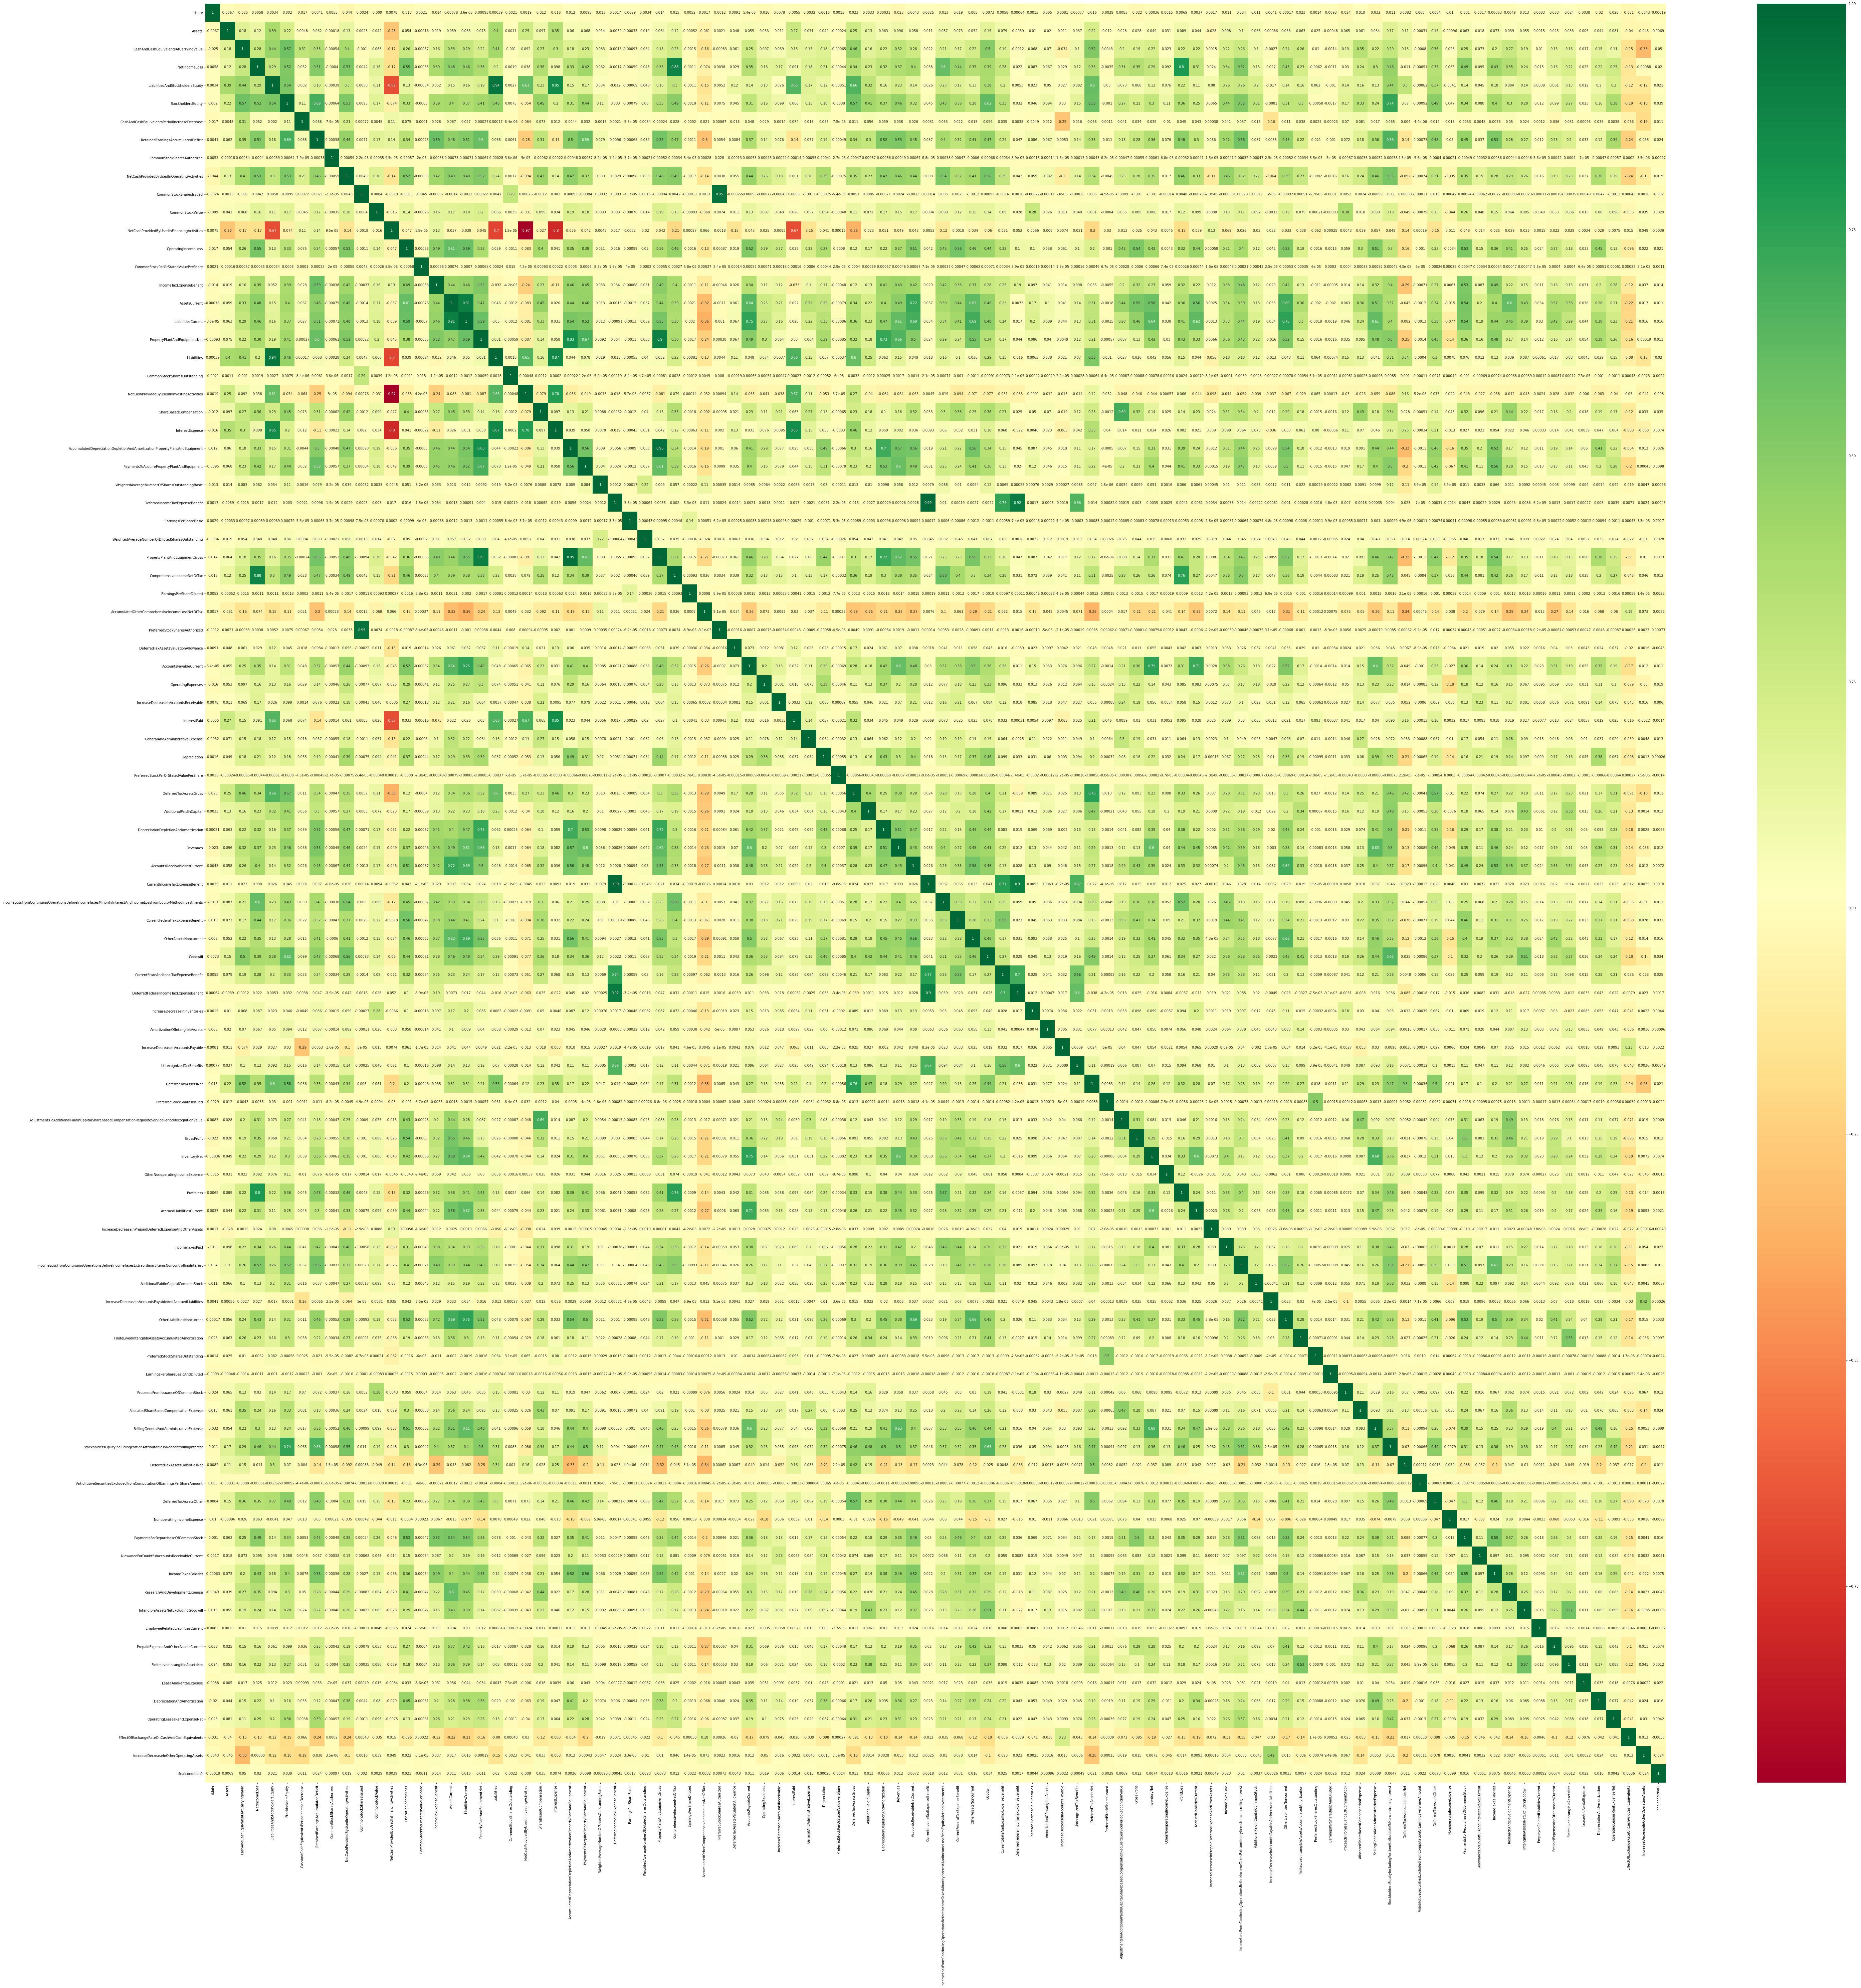

In [16]:
X = df.iloc[:,0:len(df.columns)-1]
y = df.iloc[:,-1] 

#get correlations of each features in dataset
corrmat = df.corr(method ='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(98,98))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(method ='pearson'),annot=True,cmap="RdYlGn")

plt.savefig('svm_confpearson.png', bbox_inches="tight")

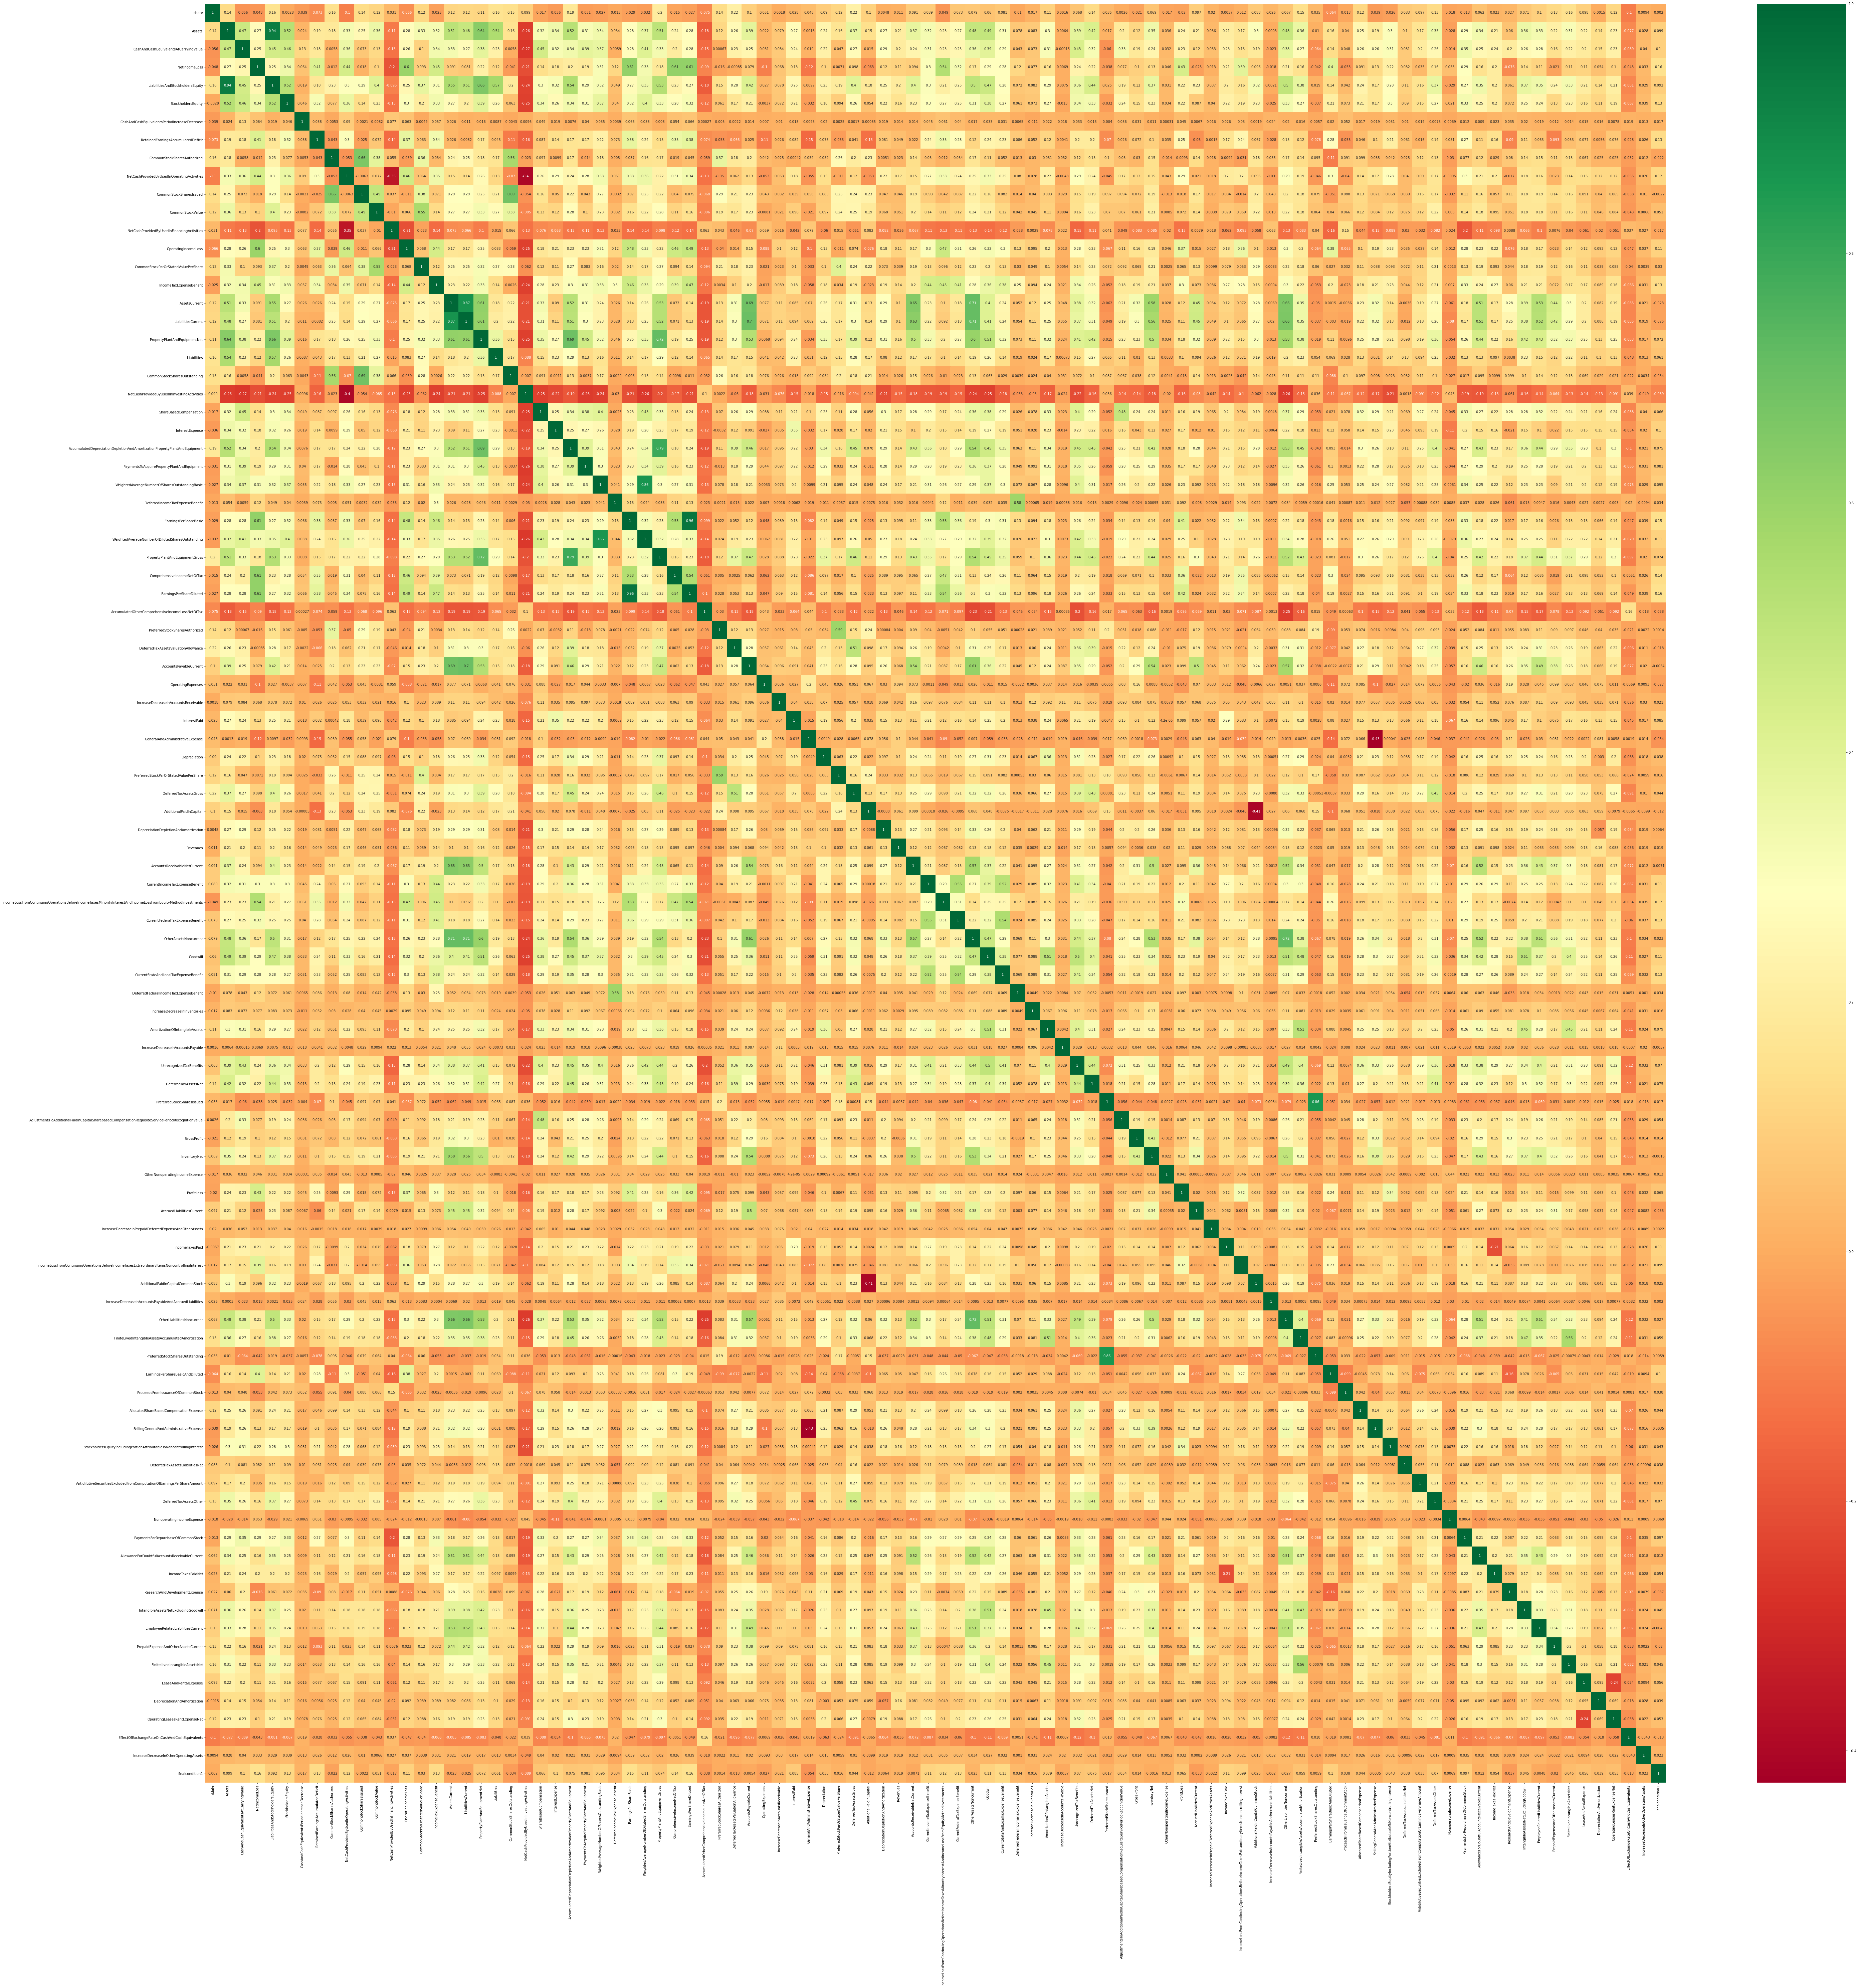

In [17]:
X = df.iloc[:,0:len(df.columns)-1]
y = df.iloc[:,-1] 

#get correlations of each features in dataset
corrmat = df.corr(method ='kendall')
top_corr_features = corrmat.index
plt.figure(figsize=(98,98))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(method ='kendall'),annot=True,cmap="RdYlGn")

plt.savefig('svm_confkendall.png', bbox_inches="tight")

In [5]:
%%time

model = KNeighborsClassifier()

scores = cross_validate( model , x_train, y_train, cv=5, scoring=('f1', 'recall', 'precision'), return_train_score=True, n_jobs=-1)

print("train_f1")
print(scores['train_f1'].mean())
print("test_f1")
print(scores['test_f1'].mean())
print("train_recall")
print(scores['train_recall'].mean())
print("test_recall")
print(scores['test_recall'].mean())
print("train_precision")
print(scores['train_precision'].mean())
print("test_precision")
print(scores['test_precision'].mean())

train_f1
0.383736978818138
test_f1
0.19247962687302936
train_recall
0.24950380242105843
test_recall
0.11776310964429774
train_precision
0.8314004593652371
test_precision
0.5328829601471111
Wall time: 5min 18s


In [6]:
%%time

model = LogisticRegression(max_iter=300)

scores = cross_validate( model , x_train, y_train, cv=5, scoring=('f1', 'recall', 'precision'), return_train_score=True, n_jobs=-1)

print("train_f1")
print(scores['train_f1'].mean())
print("test_f1")
print(scores['test_f1'].mean())
print("train_recall")
print(scores['train_recall'].mean())
print("test_recall")
print(scores['test_recall'].mean())
print("train_precision")
print(scores['train_precision'].mean())
print("test_precision")
print(scores['test_precision'].mean())

train_f1
0.036715472020133935
test_f1
0.02379826686200305
train_recall
0.01892615281936357
test_recall
0.012370125901479036
train_precision
0.6126959393686553
test_precision
0.31299019607843137
Wall time: 3.18 s


In [7]:
%%time

model = DecisionTreeClassifier()

scores = cross_validate( model , x_train, y_train, cv=5, scoring=('f1', 'recall', 'precision'), return_train_score=True, n_jobs=-1)

print("train_f1")
print(scores['train_f1'].mean())
print("test_f1")
print(scores['test_f1'].mean())
print("train_recall")
print(scores['train_recall'].mean())
print("test_recall")
print(scores['test_recall'].mean())
print("train_precision")
print(scores['train_precision'].mean())
print("test_precision")
print(scores['test_precision'].mean())

train_f1
0.9991332417302162
test_f1
0.3862539086158727
train_recall
0.9982680921153341
test_recall
0.4077191052438577
train_precision
1.0
test_precision
0.3671261413567627
Wall time: 3.82 s


In [8]:
%%time

model = RandomForestClassifier()

scores = cross_validate( model , x_train, y_train, cv=5, scoring=('f1', 'recall', 'precision'), return_train_score=True, n_jobs=-1)

print("train_f1")
print(scores['train_f1'].mean())
print("test_f1")
print(scores['test_f1'].mean())
print("train_recall")
print(scores['train_recall'].mean())
print("test_recall")
print(scores['test_recall'].mean())
print("train_precision")
print(scores['train_precision'].mean())
print("test_precision")
print(scores['test_precision'].mean())

train_f1
0.9989478472769363
test_f1
0.3035070323108499
train_recall
0.9983918544915715
test_recall
0.1801173450678401
train_precision
0.9995047203111935
test_precision
0.9683908491477007
Wall time: 17 s


In [9]:
%%time

model = SVC()

scores = cross_validate( model , x_train, y_train, cv=5, scoring=('f1', 'recall', 'precision'), return_train_score=True, n_jobs=-1)

print("train_f1")
print(scores['train_f1'].mean())
print("test_f1")
print(scores['test_f1'].mean())
print("train_recall")
print(scores['train_recall'].mean())
print("test_recall")
print(scores['test_recall'].mean())
print("train_precision")
print(scores['train_precision'].mean())
print("test_precision")
print(scores['test_precision'].mean())

train_f1
0.09316146567251742
test_f1
0.02532844150872914
train_recall
0.048861722906984574
test_recall
0.01286150837305953
train_precision
1.0
test_precision
1.0
Wall time: 1min 43s


In [10]:
%%time

model = MLPClassifier(max_iter=400,hidden_layer_sizes=(97,))

scores = cross_validate( model , x_train, y_train, cv=5, scoring=('f1', 'recall', 'precision'), return_train_score=True, n_jobs=-1)

print("train_f1")
print(scores['train_f1'].mean())
print("test_f1")
print(scores['test_f1'].mean())
print("train_recall")
print(scores['train_recall'].mean())
print("test_recall")
print(scores['test_recall'].mean())
print("train_precision")
print(scores['train_precision'].mean())
print("test_precision")
print(scores['test_precision'].mean())

train_f1
0.7148796500911968
test_f1
0.3789009912387728
train_recall
0.5722451581892883
test_recall
0.28793179317931794
train_precision
0.9562294891388914
test_precision
0.566803761238217
Wall time: 1min 14s


In [11]:
%%time

model = XGBClassifier()

scores = cross_validate( model , x_train, y_train, cv=5, scoring=('f1', 'recall', 'precision'), return_train_score=True, n_jobs=-1)

print("train_f1")
print(scores['train_f1'].mean())
print("test_f1")
print(scores['test_f1'].mean())
print("train_recall")
print(scores['train_recall'].mean())
print("test_recall")
print(scores['test_recall'].mean())
print("train_precision")
print(scores['train_precision'].mean())
print("test_precision")
print(scores['test_precision'].mean())

train_f1
0.025236194340657138
test_f1
0.011714731078648908
train_recall
0.01286661829448251
test_recall
0.005935704681579268
train_precision
0.7496825396825397
test_precision
0.6314285714285715
Wall time: 11.9 s


In [17]:
%%time

def build_fn():
    model = Sequential()
    model.add(Input(shape=(97,)))
    model.add(Dense(97, kernel_initializer="he_normal", activation="relu", kernel_regularizer = l2(0)))
    model.add(Dense(2, kernel_initializer="he_normal", activation="softmax"))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model


model = KerasClassifier(build_fn, epochs=400, batch_size=1024, verbose=0)

scores = cross_validate( model , x_train, y_train, cv=5, scoring=('f1', 'recall', 'precision'), return_train_score=True, n_jobs=1)

print("train_f1")
print(scores['train_f1'].mean())
print("test_f1")
print(scores['test_f1'].mean())
print("train_recall")
print(scores['train_recall'].mean())
print("test_recall")
print(scores['test_recall'].mean())
print("train_precision")
print(scores['train_precision'].mean())
print("test_precision")
print(scores['test_precision'].mean())

train_f1
0.6882874914698673
test_f1
0.3380793427669909
train_recall
0.5540800735447595
test_recall
0.252631549177888
train_precision
0.9243679180388839
test_precision
0.5251792138607938
Wall time: 2min 24s


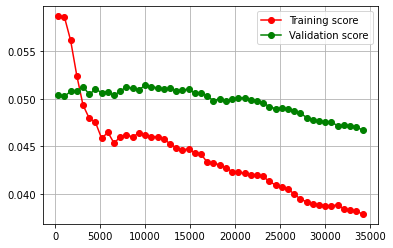

In [13]:
model = KNeighborsClassifier()

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.01, 1, 50), n_jobs=-1)

train_scores = -train_scores
test_scores = -test_scores

train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)

test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Validation score")

plt.legend(loc="best")

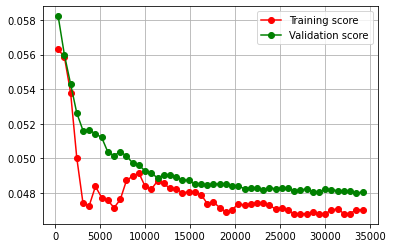

In [14]:
model = LogisticRegression(max_iter=300)

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.01, 1, 50), n_jobs=-1)

train_scores = -train_scores
test_scores = -test_scores

train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)

test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Validation score")

plt.legend(loc="best")

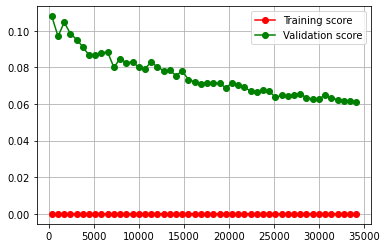

In [15]:
model = DecisionTreeClassifier()

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.01, 1, 50), n_jobs=-1)

train_scores = -train_scores
test_scores = -test_scores

train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)

test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Validation score")

plt.legend(loc="best")

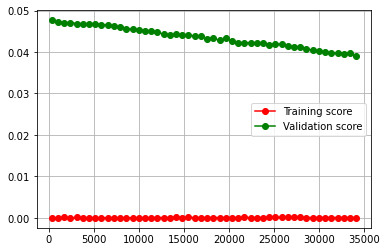

In [16]:
model = RandomForestClassifier()

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.01, 1, 50), n_jobs=-1)

train_scores = -train_scores
test_scores = -test_scores

train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)

test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Validation score")

plt.legend(loc="best")

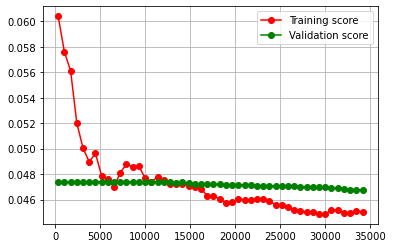

In [17]:
model = SVC()

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.01, 1, 50), n_jobs=-1)

train_scores = -train_scores
test_scores = -test_scores

train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)

test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Validation score")

plt.legend(loc="best")

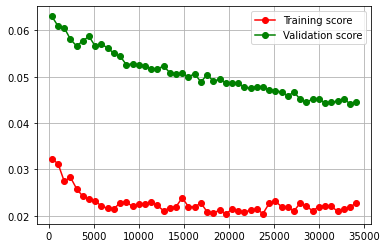

In [18]:
model = MLPClassifier(max_iter=400)

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.01, 1, 50), n_jobs=-1)

train_scores = -train_scores
test_scores = -test_scores

train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)

test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Validation score")

plt.legend(loc="best")

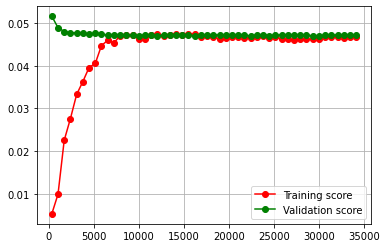

In [19]:
model = XGBClassifier()

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.01, 1, 50), n_jobs=-1)

train_scores = -train_scores
test_scores = -test_scores

train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)

test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Validation score")

plt.legend(loc="best")

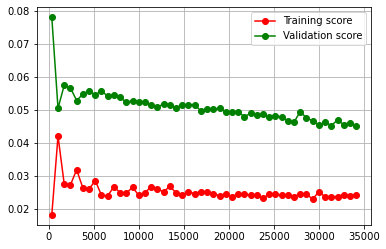

In [20]:
def build_fn():
    model = Sequential()
    model.add(Dense(97, input_dim=97, kernel_initializer="he_normal", activation="relu"))
    model.add(Dense(2, kernel_initializer="he_normal", activation="softmax"))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model


model = KerasClassifier(build_fn, epochs=400, batch_size=1024, verbose=0)

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.01, 1, 50))

train_scores = -train_scores
test_scores = -test_scores

train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)

test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Validation score")

plt.legend(loc="best")

In [3]:
model = RandomForestClassifier()

param_space = {"max_depth": [None, 6, 8, 10, 12, 14], 
               "max_features": [None,'auto', 'sqrt','log2'], 
               "min_samples_leaf": [ 1, 2, 3, 4, 5], 
               "min_samples_split": [ 1, 2, 3, 4, 5, 6], 
               "n_estimators": [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

rand_search = RandomizedSearchCV(model, param_space, n_iter=50, scoring="f1", verbose=False, cv=5, n_jobs=-1)

rand_search.fit(x_train, y_train)

print(rand_search.best_params_)
print(rand_search.best_score_)

{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': None}
0.3216036231684473


In [4]:
model = DecisionTreeClassifier()

param_space = { "max_depth": [None, 6, 8, 10, 12, 14],
                "min_samples_leaf": [ 1, 2, 3], 
                "min_samples_split": [ 1, 2, 3, 4, 5],
                "max_features": [None,'auto', 'sqrt','log2']}

rand_search = RandomizedSearchCV(model, param_space, n_iter=50, scoring="f1", verbose=False, cv=5, n_jobs=-1)

rand_search.fit(x_train, y_train)

print(rand_search.best_params_)
print(rand_search.best_score_)

{'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}
0.3828193857442561


In [5]:
model = MLPClassifier(max_iter=400)

param_space = {'hidden_layer_sizes': [(97,), (97,97), (97,97,97), (194,), (194,194), (194,194,194), (388,), (388,388), (388,388,388)],
               'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 1, 2, 4, 8, 16]}

rand_search = RandomizedSearchCV(model, param_space, n_iter=50, scoring="f1", verbose=False, cv=5, n_jobs=-1)

rand_search.fit(x_train, y_train)

print(rand_search.best_params_)
print(rand_search.best_score_)

{'hidden_layer_sizes': (194, 194, 194), 'alpha': 0.001}
0.46994601300468786


In [3]:
def build_fn(n_hidden=1,n_neurons=97,lambda_value=0):
    model = Sequential()
    model.add(Input(shape=(97,)))
        
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, kernel_initializer="he_normal", activation="relu", kernel_regularizer = l2(lambda_value)))    
    
    model.add(Dense(2, kernel_initializer="he_normal", activation="softmax"))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn, epochs=400, batch_size=1024, verbose=False)

keras_param_space = {"n_hidden": [1,2,3,4],
                     "lambda_value": [0, 0.00001, 0.000001, 0.0001, 0.001, 0.01, 0.05, 0.1, 1, 2, 4, 8],
                     "n_neurons": [97, 194, 388, 776, 1552]}

rand_search = RandomizedSearchCV(model, keras_param_space, n_iter=100, cv=5, scoring="f1",  verbose=False)

rand_search.fit(x_train, y_train)

print(rand_search.best_params_)
print(rand_search.best_score_)

{'n_neurons': 1552, 'n_hidden': 4, 'lambda_value': 0}
0.4837598404870628


In [3]:
model = XGBClassifier()

param_space = {"max_depth": [ 10, 12, 14, 16, 18, 20], 
               "n_estimators": [ 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800],
               'reg_lambda': [0, 0.0001, 0.001, 0.01, 0.1, 1, 2, 3],
               'min_child_weight': [ 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
               'colsample_bytree': [0, 1, 0.8, 0.5],
               'subsample': [ 1, 0.5, 0.8],
               'gamma': [0,1,2,3]
              }

rand_search = RandomizedSearchCV(model, param_space, n_iter=200, scoring="f1", verbose=False, cv=5, n_jobs=-1)

rand_search.fit(x_train, y_train)

print(rand_search.best_params_)
print(rand_search.best_score_)

{'subsample': 1, 'reg_lambda': 0.1, 'n_estimators': 1400, 'min_child_weight': 3, 'max_depth': 12, 'gamma': 0, 'colsample_bytree': 0.8}
0.6238260193288748


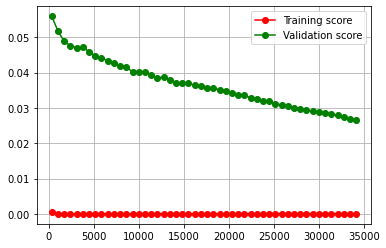

In [4]:
model = XGBClassifier(subsample=1,reg_lambda=0.1,n_estimators=1400,min_child_weight=3,max_depth=12,gamma=0,colsample_bytree=0.8)

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.01, 1, 50), n_jobs=-1)

train_scores = -train_scores
test_scores = -test_scores

train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)

test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Validation score")

plt.legend(loc="best")